In [74]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
...
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)

In [77]:
data = pd.read_csv("./diabetes.csv")
#display  data first five rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [79]:
X = data.drop(columns = ['Outcome']).copy()
y = data['Outcome']

In [80]:
scaled_data= StandardScaler()
X = scaled_data.fit_transform(X) 
#print(scale)

In [81]:
train_size=0.75

# split the data into training and remaining dataset,with shuffling
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.75,random_state=4,shuffle=True,stratify=y)
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_remaining shape: ",X_rem.shape)
print("y_remaining shape: ",y_rem.shape)


X_train shape:  (576, 8)
y_train shape:  (576,)
X_remaining shape:  (192, 8)
y_remaining shape:  (192,)


In [82]:
import collections
...
# summarize class distribution
counter = collections.Counter(y)
print(counter)

Counter({0: 500, 1: 268})


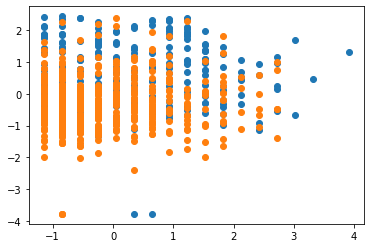

In [83]:
import numpy as np
import matplotlib.pyplot as plt
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
#pyplot.legend()
plt.show()

In [84]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define model
model = LogisticRegression(solver='lbfgs',random_state=24)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Accuracy: %.3f' % mean(scores))

Accuracy: 0.771


In [85]:
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = LogisticRegression(solver='lbfgs', random_state=24).fit(X_train, y_train)


In [86]:
pred_test1=clf.predict(X_rem)
print(accuracy_score(y_rem,pred_test1))

0.7395833333333334


In [87]:
# define model
weights = {0:0.35, 1:0.65}
model2 = LogisticRegression(solver='lbfgs', random_state=24,class_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Accuracy: %.3f' % mean(scores))

Accuracy: 0.757


In [88]:
weights = {0:0.35, 1:0.65}
clf2= LogisticRegression(solver='lbfgs', random_state=24,class_weight=weights).fit(X_train, y_train)


In [89]:
pred_test2=clf2.predict(X_rem)
print(accuracy_score(y_rem,pred_test2))

0.6927083333333334


In [90]:
# define model
model3 = LogisticRegression(solver='lbfgs',random_state=24, class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model3, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Accuracy: %.3f' % mean(scores))

Accuracy: 0.757


In [91]:
clf3= LogisticRegression(solver='lbfgs', random_state=24,class_weight='balanced').fit(X_train, y_train)

In [92]:
pred_test3=clf3.predict(X_rem)
print(accuracy_score(y_rem,pred_test3))

0.6927083333333334


In [93]:
from sklearn.model_selection import GridSearchCV
# define model
model4 = LogisticRegression(solver='lbfgs',random_state=24)
# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:0.35,1:0.65}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model4, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.771235 using {'class_weight': {0: 1, 1: 1}}
0.651059 (0.003418) with: {'class_weight': {0: 100, 1: 1}}
0.666285 (0.017885) with: {'class_weight': {0: 10, 1: 1}}
0.771235 (0.041968) with: {'class_weight': {0: 1, 1: 1}}
0.547750 (0.042978) with: {'class_weight': {0: 1, 1: 10}}
0.757422 (0.050396) with: {'class_weight': {0: 0.35, 1: 0.65}}


In [94]:
weights = {0:1, 1:1}
clf4= LogisticRegression(solver='lbfgs', random_state=24,class_weight=weights).fit(X_train, y_train)

In [95]:
pred_test4=clf4.predict(X_rem)
print(accuracy_score(y_rem,pred_test4))

0.7395833333333334


In [96]:
from sklearn.model_selection import GridSearchCV
# define model
model5 = LogisticRegression(solver='lbfgs',random_state=24)
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)
# define grid
balance=[{0:x ,1:1.0 -x} for x in weights]
#balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:0.35,1:0.65}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model5, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.775587 using {'class_weight': {0: 0.5197995991983968, 1: 0.4802004008016032}}


In [97]:
weights = {0:0.52, 1:0.48}
clf5= LogisticRegression(solver='lbfgs', random_state=24,class_weight=weights).fit(X_train, y_train)

In [98]:
pred_test5=clf5.predict(X_rem)
print(accuracy_score(y_rem,pred_test5))

0.75
